In [4]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [5]:
# Data Preparation

In [9]:
# Acquire Data
current_path = os.getcwd()
file = '/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(current_path + file)

In [10]:
# Explore Data
data.shape

(284807, 31)

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [15]:
nanCounter = np.isnan(data).sum()

In [16]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [18]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [19]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [20]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [21]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [22]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

In [23]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [24]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.881566e-18,-1.277349e-17,-4.790058e-17,-1.955940e-17,3.832046e-17,9.979288e-18,1.476935e-17,3.293165e-18,9.979288e-20,...,-7.035398e-18,-4.989644e-19,2.794201e-18,9.380530e-18,1.117680e-17,-5.109395e-17,7.946008e-18,1.234937e-18,-6.336848e-18,2.913952e-17
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [25]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [26]:
correlation_file = '\\datasets\\credit_card_data\\correlationMatrix.csv'
correlationMatrix.to_csv(current_path+correlation_file)

Text(0, 0.5, 'Frequency Percentage')

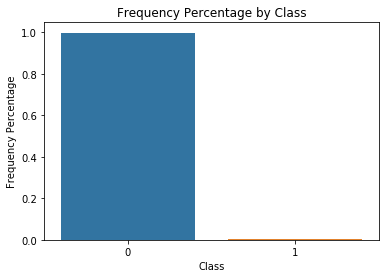

In [27]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [28]:
# Model Preparation

In [59]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.333, 
                                    random_state=2020, stratify=dataY)

In [60]:
len(X_train)

189966

In [61]:
len(X_test)

94841

In [62]:
y_train.sum()/len(y_train)

0.0017266247644315297

In [63]:
y_test.sum()/len(y_test)

0.0017292099408483673

In [65]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1992)

In [66]:
# Logistic Regression

In [68]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2020
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [69]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10470278586557656
CV Log Loss:  0.10602813480588028
Training Log Loss:  0.11328277389658678
CV Log Loss:  0.11485471166498028
Training Log Loss:  0.1333820789494988
CV Log Loss:  0.12711124732400458
Training Log Loss:  0.11847848070077147
CV Log Loss:  0.11986328260567083
Training Log Loss:  0.11593940551340455
CV Log Loss:  0.11863674889745791
Logistic Regression Log Loss:  0.11729876572955941


In [70]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

In [71]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

In [72]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.71')

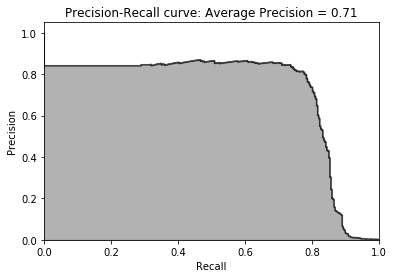

In [73]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [74]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [75]:
areaUnderROC = auc(fpr, tpr)

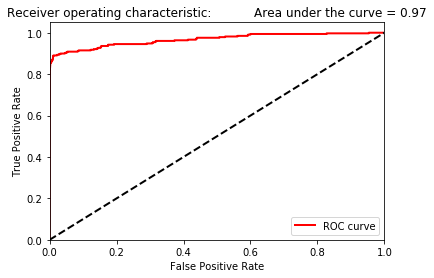

In [76]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [82]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2020
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [105]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.00037273308707423154
CV Log Loss:  0.012745418890621134
Training Log Loss:  0.00040313072187261526
CV Log Loss:  0.011809319335119597
Training Log Loss:  0.00044851816834431024
CV Log Loss:  0.007066460137296797
Training Log Loss:  0.0003968053654634583
CV Log Loss:  0.008305877971707759
Training Log Loss:  0.00044668477685603543
CV Log Loss:  0.010835531045396583
Random Forests Log Loss:  0.010152535125299376


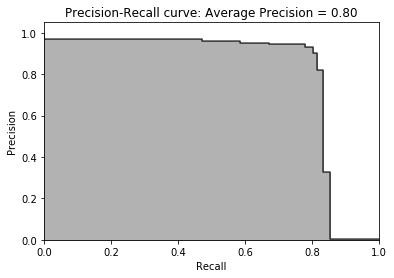

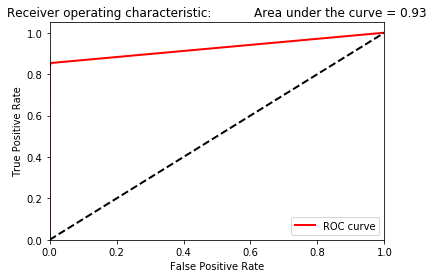

In [106]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [107]:
params_xGB = {
    'nthread':16, #number of cores
    'learning rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0 
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, #range 1 to infinity, default 6
    'min_child_weight': 1, #range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, #range 0 to 1, default 1 
        # subsample ratio of features
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [108]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-logloss:0.437811+1.38564e-05	test-logloss:0.437936+2.98288e-05
[50]	train-logloss:0.0001296+5.67803e-06	test-logloss:0.002865+0.000689861
[100]	train-logloss:5.36e-05+1.35647e-06	test-logloss:0.0030678+0.000727044
[150]	train-logloss:4e-05+6.32456e-07	test-logloss:0.0031642+0.000749142
[200]	train-logloss:3.4e-05+6.32456e-07	test-logloss:0.003205+0.000755551


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Training Log Loss:  0.0007614173901631848
CV Log Loss:  0.003330692283987808


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-logloss:0.437794+1.28779e-05	test-logloss:0.437934+5.58734e-05
[50]	train-logloss:0.0001278+4.62169e-06	test-logloss:0.0029402+0.000368682
[100]	train-logloss:5.3e-05+1.41421e-06	test-logloss:0.0031764+0.000424752
[150]	train-logloss:3.98e-05+7.48331e-07	test-logloss:0.0032832+0.000439383
[200]	train-logloss:3.38e-05+7.48331e-07	test-logloss:0.0033164+0.000443525


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Training Log Loss:  0.0008975357844705896
CV Log Loss:  0.0035052224331305515


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-logloss:0.437844+1.69776e-05	test-logloss:0.437968+4.19571e-05
[50]	train-logloss:0.0001464+7.65768e-06	test-logloss:0.0033712+0.000457199
[100]	train-logloss:5.88e-05+1.32665e-06	test-logloss:0.0036712+0.000514211
[150]	train-logloss:4.32e-05+9.79796e-07	test-logloss:0.0037874+0.000538453
[200]	train-logloss:3.66e-05+8e-07	test-logloss:0.003852+0.000559326


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Training Log Loss:  0.0009424850446092042
CV Log Loss:  0.001693636067906578


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-logloss:0.437832+1.97018e-05	test-logloss:0.437917+3.63835e-05
[50]	train-logloss:0.000136+4.89898e-06	test-logloss:0.0031072+0.000423748
[100]	train-logloss:5.6e-05+1.26491e-06	test-logloss:0.003385+0.00050771
[150]	train-logloss:4.16e-05+8e-07	test-logloss:0.0034888+0.000528332
[200]	train-logloss:3.54e-05+4.89898e-07	test-logloss:0.0035552+0.000543852


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Training Log Loss:  0.0007548695589374314
CV Log Loss:  0.0023208136779375235


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-logloss:0.43782+1.48108e-05	test-logloss:0.437962+1.80621e-05
[50]	train-logloss:0.000134+7.07107e-06	test-logloss:0.003157+0.000715856
[100]	train-logloss:5.4e-05+1.78885e-06	test-logloss:0.0034264+0.000801963
[150]	train-logloss:4.02e-05+1.16619e-06	test-logloss:0.003536+0.000834855
[200]	train-logloss:3.44e-05+8e-07	test-logloss:0.003595+0.000858535


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Training Log Loss:  0.0008292608339788685
CV Log Loss:  0.002606891493595989
XGBoost Gradient Boosting Log Loss:  0.002691454556340657


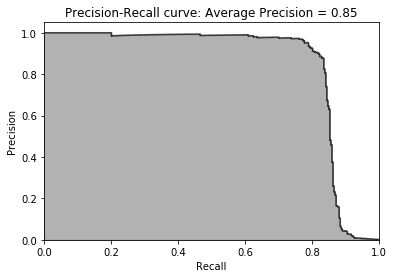

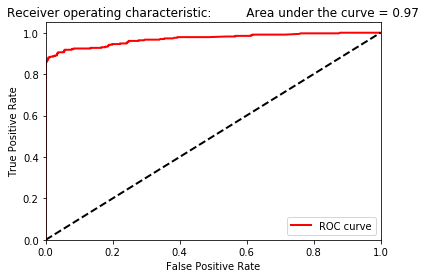

In [109]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [110]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [111]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00667341
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00661067
[3]	valid_0's binary_logloss: 0.00654638
[4]	valid_0's binary_logloss: 0.00649046
[5]	valid_0's binary_logloss: 0.00643178
[6]	valid_0's binary_logloss: 0.00638091
[7]	valid_0's binary_logloss: 0.00632601
[8]	valid_0's binary_logloss: 0.00627518
[9]	valid_0's binary_logloss: 0.00623296
[10]	valid_0's binary_logloss: 0.00617836
[11]	valid_0's binary_logloss: 0.00613087
[12]	valid_0's binary_logloss: 0.00608192
[13]	valid_0's binary_logloss: 0.0060381
[14]	valid_0's binary_logloss: 0.00599814
[15]	valid_0's binary_logloss: 0.00595796
[16]	valid_0's binary_logloss: 0.00591763
[17]	valid_0's binary_logloss: 0.00587868
[18]	valid_0's binary_logloss: 0.00583892
[19]	valid_0's binary_logloss: 0.0058024
[20]	valid_0's binary_logloss: 0.0057679
[21]	valid_0's binary_logloss: 0.00573197
[22]	valid_0's binary_logloss: 0.00569818
[23]	valid_0's binary_logl

[198]	valid_0's binary_logloss: 0.00384766
[199]	valid_0's binary_logloss: 0.00384457
[200]	valid_0's binary_logloss: 0.00384364
[201]	valid_0's binary_logloss: 0.00384111
[202]	valid_0's binary_logloss: 0.00383937
[203]	valid_0's binary_logloss: 0.00383643
[204]	valid_0's binary_logloss: 0.00383525
[205]	valid_0's binary_logloss: 0.00383129
[206]	valid_0's binary_logloss: 0.00382913
[207]	valid_0's binary_logloss: 0.00382542
[208]	valid_0's binary_logloss: 0.00382352
[209]	valid_0's binary_logloss: 0.00382153
[210]	valid_0's binary_logloss: 0.00382052
[211]	valid_0's binary_logloss: 0.00381853
[212]	valid_0's binary_logloss: 0.0038165
[213]	valid_0's binary_logloss: 0.0038113
[214]	valid_0's binary_logloss: 0.00380814
[215]	valid_0's binary_logloss: 0.00380652
[216]	valid_0's binary_logloss: 0.00380451
[217]	valid_0's binary_logloss: 0.0038017
[218]	valid_0's binary_logloss: 0.00379846
[219]	valid_0's binary_logloss: 0.00379603
[220]	valid_0's binary_logloss: 0.00379459
[221]	valid_0'

[391]	valid_0's binary_logloss: 0.00360019
[392]	valid_0's binary_logloss: 0.00359958
[393]	valid_0's binary_logloss: 0.00359821
[394]	valid_0's binary_logloss: 0.00359602
[395]	valid_0's binary_logloss: 0.00359581
[396]	valid_0's binary_logloss: 0.00359555
[397]	valid_0's binary_logloss: 0.00359509
[398]	valid_0's binary_logloss: 0.00359475
[399]	valid_0's binary_logloss: 0.00359344
[400]	valid_0's binary_logloss: 0.00359292
[401]	valid_0's binary_logloss: 0.00359164
[402]	valid_0's binary_logloss: 0.00359232
[403]	valid_0's binary_logloss: 0.00359185
[404]	valid_0's binary_logloss: 0.00359065
[405]	valid_0's binary_logloss: 0.00359076
[406]	valid_0's binary_logloss: 0.00358955
[407]	valid_0's binary_logloss: 0.0035893
[408]	valid_0's binary_logloss: 0.00359025
[409]	valid_0's binary_logloss: 0.00358792
[410]	valid_0's binary_logloss: 0.00358726
[411]	valid_0's binary_logloss: 0.00358784
[412]	valid_0's binary_logloss: 0.00358801
[413]	valid_0's binary_logloss: 0.00358762
[414]	valid_

[583]	valid_0's binary_logloss: 0.00358401
[584]	valid_0's binary_logloss: 0.00358313
[585]	valid_0's binary_logloss: 0.00358314
[586]	valid_0's binary_logloss: 0.00358483
[587]	valid_0's binary_logloss: 0.00358514
[588]	valid_0's binary_logloss: 0.00358429
[589]	valid_0's binary_logloss: 0.00358429
[590]	valid_0's binary_logloss: 0.00358432
[591]	valid_0's binary_logloss: 0.00358414
[592]	valid_0's binary_logloss: 0.00358522
[593]	valid_0's binary_logloss: 0.00358691
[594]	valid_0's binary_logloss: 0.00358685
[595]	valid_0's binary_logloss: 0.00358658
[596]	valid_0's binary_logloss: 0.00358641
[597]	valid_0's binary_logloss: 0.00358716
[598]	valid_0's binary_logloss: 0.00358634
[599]	valid_0's binary_logloss: 0.00358673
[600]	valid_0's binary_logloss: 0.00358805
[601]	valid_0's binary_logloss: 0.0035893
[602]	valid_0's binary_logloss: 0.00358903
[603]	valid_0's binary_logloss: 0.00358908
[604]	valid_0's binary_logloss: 0.00359078
[605]	valid_0's binary_logloss: 0.00359113
[606]	valid_

[96]	valid_0's binary_logloss: 0.00394157
[97]	valid_0's binary_logloss: 0.00393361
[98]	valid_0's binary_logloss: 0.00392499
[99]	valid_0's binary_logloss: 0.00391698
[100]	valid_0's binary_logloss: 0.0039087
[101]	valid_0's binary_logloss: 0.00390051
[102]	valid_0's binary_logloss: 0.00389297
[103]	valid_0's binary_logloss: 0.00388724
[104]	valid_0's binary_logloss: 0.00387949
[105]	valid_0's binary_logloss: 0.00387192
[106]	valid_0's binary_logloss: 0.00386411
[107]	valid_0's binary_logloss: 0.00385719
[108]	valid_0's binary_logloss: 0.0038498
[109]	valid_0's binary_logloss: 0.00384299
[110]	valid_0's binary_logloss: 0.00383572
[111]	valid_0's binary_logloss: 0.00382829
[112]	valid_0's binary_logloss: 0.0038224
[113]	valid_0's binary_logloss: 0.00381602
[114]	valid_0's binary_logloss: 0.00380891
[115]	valid_0's binary_logloss: 0.00380362
[116]	valid_0's binary_logloss: 0.00379795
[117]	valid_0's binary_logloss: 0.00379137
[118]	valid_0's binary_logloss: 0.00378504
[119]	valid_0's bi

[288]	valid_0's binary_logloss: 0.0034119
[289]	valid_0's binary_logloss: 0.00341079
[290]	valid_0's binary_logloss: 0.00340933
[291]	valid_0's binary_logloss: 0.00340723
[292]	valid_0's binary_logloss: 0.00340756
[293]	valid_0's binary_logloss: 0.00340614
[294]	valid_0's binary_logloss: 0.00340491
[295]	valid_0's binary_logloss: 0.00340506
[296]	valid_0's binary_logloss: 0.00340389
[297]	valid_0's binary_logloss: 0.00340337
[298]	valid_0's binary_logloss: 0.0034017
[299]	valid_0's binary_logloss: 0.00340266
[300]	valid_0's binary_logloss: 0.00340184
[301]	valid_0's binary_logloss: 0.00340059
[302]	valid_0's binary_logloss: 0.00339962
[303]	valid_0's binary_logloss: 0.00339805
[304]	valid_0's binary_logloss: 0.00339804
[305]	valid_0's binary_logloss: 0.0033968
[306]	valid_0's binary_logloss: 0.00339607
[307]	valid_0's binary_logloss: 0.00339581
[308]	valid_0's binary_logloss: 0.00339585
[309]	valid_0's binary_logloss: 0.00339564
[310]	valid_0's binary_logloss: 0.00339567
[311]	valid_0'

[483]	valid_0's binary_logloss: 0.00345927
[484]	valid_0's binary_logloss: 0.00345886
[485]	valid_0's binary_logloss: 0.00345998
[486]	valid_0's binary_logloss: 0.00345952
[487]	valid_0's binary_logloss: 0.0034586
[488]	valid_0's binary_logloss: 0.00345959
[489]	valid_0's binary_logloss: 0.00346045
[490]	valid_0's binary_logloss: 0.00346008
[491]	valid_0's binary_logloss: 0.00346027
[492]	valid_0's binary_logloss: 0.00345971
[493]	valid_0's binary_logloss: 0.00346071
[494]	valid_0's binary_logloss: 0.00346091
[495]	valid_0's binary_logloss: 0.00346206
[496]	valid_0's binary_logloss: 0.0034623
[497]	valid_0's binary_logloss: 0.00346143
[498]	valid_0's binary_logloss: 0.0034605
[499]	valid_0's binary_logloss: 0.0034615
[500]	valid_0's binary_logloss: 0.00346059
[501]	valid_0's binary_logloss: 0.00346082
[502]	valid_0's binary_logloss: 0.00345997
[503]	valid_0's binary_logloss: 0.00346024
[504]	valid_0's binary_logloss: 0.00346118
[505]	valid_0's binary_logloss: 0.00346036
[506]	valid_0's

[138]	valid_0's binary_logloss: 0.00235032
[139]	valid_0's binary_logloss: 0.00234307
[140]	valid_0's binary_logloss: 0.00233673
[141]	valid_0's binary_logloss: 0.00233068
[142]	valid_0's binary_logloss: 0.00232336
[143]	valid_0's binary_logloss: 0.00231718
[144]	valid_0's binary_logloss: 0.00230881
[145]	valid_0's binary_logloss: 0.0023019
[146]	valid_0's binary_logloss: 0.002295
[147]	valid_0's binary_logloss: 0.0022894
[148]	valid_0's binary_logloss: 0.00228347
[149]	valid_0's binary_logloss: 0.00227547
[150]	valid_0's binary_logloss: 0.00226898
[151]	valid_0's binary_logloss: 0.0022629
[152]	valid_0's binary_logloss: 0.00225666
[153]	valid_0's binary_logloss: 0.00225014
[154]	valid_0's binary_logloss: 0.00224334
[155]	valid_0's binary_logloss: 0.00223741
[156]	valid_0's binary_logloss: 0.00223189
[157]	valid_0's binary_logloss: 0.00222453
[158]	valid_0's binary_logloss: 0.00221895
[159]	valid_0's binary_logloss: 0.00221344
[160]	valid_0's binary_logloss: 0.00220709
[161]	valid_0's 

[329]	valid_0's binary_logloss: 0.00177686
[330]	valid_0's binary_logloss: 0.00177626
[331]	valid_0's binary_logloss: 0.00177539
[332]	valid_0's binary_logloss: 0.0017742
[333]	valid_0's binary_logloss: 0.00177363
[334]	valid_0's binary_logloss: 0.00177216
[335]	valid_0's binary_logloss: 0.00177159
[336]	valid_0's binary_logloss: 0.00177075
[337]	valid_0's binary_logloss: 0.00176924
[338]	valid_0's binary_logloss: 0.00176874
[339]	valid_0's binary_logloss: 0.00176822
[340]	valid_0's binary_logloss: 0.00176744
[341]	valid_0's binary_logloss: 0.00176605
[342]	valid_0's binary_logloss: 0.00176521
[343]	valid_0's binary_logloss: 0.00176485
[344]	valid_0's binary_logloss: 0.00176377
[345]	valid_0's binary_logloss: 0.00176206
[346]	valid_0's binary_logloss: 0.00176151
[347]	valid_0's binary_logloss: 0.00176089
[348]	valid_0's binary_logloss: 0.00176031
[349]	valid_0's binary_logloss: 0.00176009
[350]	valid_0's binary_logloss: 0.00175916
[351]	valid_0's binary_logloss: 0.00175839
[352]	valid_

[524]	valid_0's binary_logloss: 0.00165331
[525]	valid_0's binary_logloss: 0.00165341
[526]	valid_0's binary_logloss: 0.00165397
[527]	valid_0's binary_logloss: 0.00165351
[528]	valid_0's binary_logloss: 0.00165408
[529]	valid_0's binary_logloss: 0.00165435
[530]	valid_0's binary_logloss: 0.00165329
[531]	valid_0's binary_logloss: 0.00165259
[532]	valid_0's binary_logloss: 0.00165312
[533]	valid_0's binary_logloss: 0.00165362
[534]	valid_0's binary_logloss: 0.00165329
[535]	valid_0's binary_logloss: 0.00165333
[536]	valid_0's binary_logloss: 0.0016525
[537]	valid_0's binary_logloss: 0.00165173
[538]	valid_0's binary_logloss: 0.00165185
[539]	valid_0's binary_logloss: 0.00165125
[540]	valid_0's binary_logloss: 0.00165093
[541]	valid_0's binary_logloss: 0.00165008
[542]	valid_0's binary_logloss: 0.00165015
[543]	valid_0's binary_logloss: 0.0016494
[544]	valid_0's binary_logloss: 0.00164917
[545]	valid_0's binary_logloss: 0.00164887
[546]	valid_0's binary_logloss: 0.00164814
[547]	valid_0

[718]	valid_0's binary_logloss: 0.00159794
[719]	valid_0's binary_logloss: 0.00159792
[720]	valid_0's binary_logloss: 0.00159753
[721]	valid_0's binary_logloss: 0.00159789
[722]	valid_0's binary_logloss: 0.00159728
[723]	valid_0's binary_logloss: 0.00159645
[724]	valid_0's binary_logloss: 0.00159611
[725]	valid_0's binary_logloss: 0.00159583
[726]	valid_0's binary_logloss: 0.00159586
[727]	valid_0's binary_logloss: 0.00159623
[728]	valid_0's binary_logloss: 0.00159622
[729]	valid_0's binary_logloss: 0.00159619
[730]	valid_0's binary_logloss: 0.00159595
[731]	valid_0's binary_logloss: 0.00159599
[732]	valid_0's binary_logloss: 0.001596
[733]	valid_0's binary_logloss: 0.00159599
[734]	valid_0's binary_logloss: 0.00159595
[735]	valid_0's binary_logloss: 0.00159392
[736]	valid_0's binary_logloss: 0.00159359
[737]	valid_0's binary_logloss: 0.0015939
[738]	valid_0's binary_logloss: 0.00159209
[739]	valid_0's binary_logloss: 0.00159186
[740]	valid_0's binary_logloss: 0.00159129
[741]	valid_0'

[914]	valid_0's binary_logloss: 0.00154412
[915]	valid_0's binary_logloss: 0.00154456
[916]	valid_0's binary_logloss: 0.00154519
[917]	valid_0's binary_logloss: 0.00154524
[918]	valid_0's binary_logloss: 0.00154445
[919]	valid_0's binary_logloss: 0.00154442
[920]	valid_0's binary_logloss: 0.0015438
[921]	valid_0's binary_logloss: 0.00154365
[922]	valid_0's binary_logloss: 0.00154358
[923]	valid_0's binary_logloss: 0.00154377
[924]	valid_0's binary_logloss: 0.00154327
[925]	valid_0's binary_logloss: 0.00154344
[926]	valid_0's binary_logloss: 0.00154384
[927]	valid_0's binary_logloss: 0.001544
[928]	valid_0's binary_logloss: 0.00154415
[929]	valid_0's binary_logloss: 0.00154342
[930]	valid_0's binary_logloss: 0.00154282
[931]	valid_0's binary_logloss: 0.00154288
[932]	valid_0's binary_logloss: 0.00154286
[933]	valid_0's binary_logloss: 0.00154291
[934]	valid_0's binary_logloss: 0.00154278
[935]	valid_0's binary_logloss: 0.00154221
[936]	valid_0's binary_logloss: 0.00154153
[937]	valid_0'

[1104]	valid_0's binary_logloss: 0.00153333
[1105]	valid_0's binary_logloss: 0.00153344
[1106]	valid_0's binary_logloss: 0.00153378
[1107]	valid_0's binary_logloss: 0.0015333
[1108]	valid_0's binary_logloss: 0.00153313
[1109]	valid_0's binary_logloss: 0.00153361
[1110]	valid_0's binary_logloss: 0.00153339
[1111]	valid_0's binary_logloss: 0.00153388
[1112]	valid_0's binary_logloss: 0.00153341
[1113]	valid_0's binary_logloss: 0.00153362
[1114]	valid_0's binary_logloss: 0.00153381
[1115]	valid_0's binary_logloss: 0.00153387
[1116]	valid_0's binary_logloss: 0.001534
[1117]	valid_0's binary_logloss: 0.00153451
[1118]	valid_0's binary_logloss: 0.0015347
[1119]	valid_0's binary_logloss: 0.0015348
[1120]	valid_0's binary_logloss: 0.00153529
[1121]	valid_0's binary_logloss: 0.00153484
[1122]	valid_0's binary_logloss: 0.00153414
[1123]	valid_0's binary_logloss: 0.00153427
[1124]	valid_0's binary_logloss: 0.00153435
[1125]	valid_0's binary_logloss: 0.00153455
[1126]	valid_0's binary_logloss: 0.00

[54]	valid_0's binary_logloss: 0.0038765
[55]	valid_0's binary_logloss: 0.00385453
[56]	valid_0's binary_logloss: 0.00383313
[57]	valid_0's binary_logloss: 0.00381305
[58]	valid_0's binary_logloss: 0.00379312
[59]	valid_0's binary_logloss: 0.00377434
[60]	valid_0's binary_logloss: 0.00375511
[61]	valid_0's binary_logloss: 0.00373506
[62]	valid_0's binary_logloss: 0.00371672
[63]	valid_0's binary_logloss: 0.00369665
[64]	valid_0's binary_logloss: 0.00367739
[65]	valid_0's binary_logloss: 0.00365638
[66]	valid_0's binary_logloss: 0.00363756
[67]	valid_0's binary_logloss: 0.00361866
[68]	valid_0's binary_logloss: 0.00360071
[69]	valid_0's binary_logloss: 0.0035709
[70]	valid_0's binary_logloss: 0.00355472
[71]	valid_0's binary_logloss: 0.00353731
[72]	valid_0's binary_logloss: 0.0035203
[73]	valid_0's binary_logloss: 0.00350455
[74]	valid_0's binary_logloss: 0.00348932
[75]	valid_0's binary_logloss: 0.00347302
[76]	valid_0's binary_logloss: 0.00345879
[77]	valid_0's binary_logloss: 0.0034

[251]	valid_0's binary_logloss: 0.00251904
[252]	valid_0's binary_logloss: 0.00251814
[253]	valid_0's binary_logloss: 0.00251684
[254]	valid_0's binary_logloss: 0.00251508
[255]	valid_0's binary_logloss: 0.00251343
[256]	valid_0's binary_logloss: 0.00251194
[257]	valid_0's binary_logloss: 0.00251042
[258]	valid_0's binary_logloss: 0.00250923
[259]	valid_0's binary_logloss: 0.00250821
[260]	valid_0's binary_logloss: 0.00250678
[261]	valid_0's binary_logloss: 0.00250494
[262]	valid_0's binary_logloss: 0.00250287
[263]	valid_0's binary_logloss: 0.00250089
[264]	valid_0's binary_logloss: 0.00249951
[265]	valid_0's binary_logloss: 0.00249763
[266]	valid_0's binary_logloss: 0.00249661
[267]	valid_0's binary_logloss: 0.00249534
[268]	valid_0's binary_logloss: 0.00249337
[269]	valid_0's binary_logloss: 0.00249015
[270]	valid_0's binary_logloss: 0.00248895
[271]	valid_0's binary_logloss: 0.0024867
[272]	valid_0's binary_logloss: 0.00248478
[273]	valid_0's binary_logloss: 0.00248359
[274]	valid_

[443]	valid_0's binary_logloss: 0.00235578
[444]	valid_0's binary_logloss: 0.00235548
[445]	valid_0's binary_logloss: 0.00235499
[446]	valid_0's binary_logloss: 0.00235494
[447]	valid_0's binary_logloss: 0.00235461
[448]	valid_0's binary_logloss: 0.00235366
[449]	valid_0's binary_logloss: 0.00235307
[450]	valid_0's binary_logloss: 0.00235274
[451]	valid_0's binary_logloss: 0.00235222
[452]	valid_0's binary_logloss: 0.00235131
[453]	valid_0's binary_logloss: 0.00235041
[454]	valid_0's binary_logloss: 0.00235064
[455]	valid_0's binary_logloss: 0.00235062
[456]	valid_0's binary_logloss: 0.00234974
[457]	valid_0's binary_logloss: 0.00234881
[458]	valid_0's binary_logloss: 0.00234736
[459]	valid_0's binary_logloss: 0.00234647
[460]	valid_0's binary_logloss: 0.00234578
[461]	valid_0's binary_logloss: 0.00234518
[462]	valid_0's binary_logloss: 0.00234566
[463]	valid_0's binary_logloss: 0.00234382
[464]	valid_0's binary_logloss: 0.00234299
[465]	valid_0's binary_logloss: 0.00234209
[466]	valid

[636]	valid_0's binary_logloss: 0.00231712
[637]	valid_0's binary_logloss: 0.00231729
[638]	valid_0's binary_logloss: 0.00231746
[639]	valid_0's binary_logloss: 0.00231668
[640]	valid_0's binary_logloss: 0.00231658
[641]	valid_0's binary_logloss: 0.00231699
[642]	valid_0's binary_logloss: 0.00231662
[643]	valid_0's binary_logloss: 0.00231653
[644]	valid_0's binary_logloss: 0.00231584
[645]	valid_0's binary_logloss: 0.00231524
[646]	valid_0's binary_logloss: 0.00231543
[647]	valid_0's binary_logloss: 0.0023165
[648]	valid_0's binary_logloss: 0.00231559
[649]	valid_0's binary_logloss: 0.00231538
[650]	valid_0's binary_logloss: 0.00231585
[651]	valid_0's binary_logloss: 0.00231582
[652]	valid_0's binary_logloss: 0.00231565
[653]	valid_0's binary_logloss: 0.00231532
[654]	valid_0's binary_logloss: 0.00231555
[655]	valid_0's binary_logloss: 0.00231588
[656]	valid_0's binary_logloss: 0.00231556
[657]	valid_0's binary_logloss: 0.00231539
[658]	valid_0's binary_logloss: 0.00231521
[659]	valid_

[832]	valid_0's binary_logloss: 0.00232617
[833]	valid_0's binary_logloss: 0.00232574
[834]	valid_0's binary_logloss: 0.00232599
[835]	valid_0's binary_logloss: 0.00232554
[836]	valid_0's binary_logloss: 0.00232558
[837]	valid_0's binary_logloss: 0.00232572
[838]	valid_0's binary_logloss: 0.00232402
[839]	valid_0's binary_logloss: 0.00232356
[840]	valid_0's binary_logloss: 0.0023229
[841]	valid_0's binary_logloss: 0.00232336
[842]	valid_0's binary_logloss: 0.00232305
[843]	valid_0's binary_logloss: 0.00232261
[844]	valid_0's binary_logloss: 0.00232313
[845]	valid_0's binary_logloss: 0.00232349
[846]	valid_0's binary_logloss: 0.00232296
[847]	valid_0's binary_logloss: 0.00232288
[848]	valid_0's binary_logloss: 0.00232245
[849]	valid_0's binary_logloss: 0.00232239
[850]	valid_0's binary_logloss: 0.00232247
[851]	valid_0's binary_logloss: 0.00232234
[852]	valid_0's binary_logloss: 0.00232165
[853]	valid_0's binary_logloss: 0.00232181
[854]	valid_0's binary_logloss: 0.00232223
[855]	valid_

[136]	valid_0's binary_logloss: 0.00364812
[137]	valid_0's binary_logloss: 0.00364111
[138]	valid_0's binary_logloss: 0.00363441
[139]	valid_0's binary_logloss: 0.00362648
[140]	valid_0's binary_logloss: 0.00362003
[141]	valid_0's binary_logloss: 0.00361196
[142]	valid_0's binary_logloss: 0.00360501
[143]	valid_0's binary_logloss: 0.00359851
[144]	valid_0's binary_logloss: 0.00359227
[145]	valid_0's binary_logloss: 0.00358486
[146]	valid_0's binary_logloss: 0.00357707
[147]	valid_0's binary_logloss: 0.00357097
[148]	valid_0's binary_logloss: 0.00356428
[149]	valid_0's binary_logloss: 0.00355776
[150]	valid_0's binary_logloss: 0.00355255
[151]	valid_0's binary_logloss: 0.00354615
[152]	valid_0's binary_logloss: 0.00353975
[153]	valid_0's binary_logloss: 0.00353464
[154]	valid_0's binary_logloss: 0.00352826
[155]	valid_0's binary_logloss: 0.00352301
[156]	valid_0's binary_logloss: 0.0035167
[157]	valid_0's binary_logloss: 0.00350956
[158]	valid_0's binary_logloss: 0.0035048
[159]	valid_0

[330]	valid_0's binary_logloss: 0.00303347
[331]	valid_0's binary_logloss: 0.00303274
[332]	valid_0's binary_logloss: 0.00303053
[333]	valid_0's binary_logloss: 0.00302945
[334]	valid_0's binary_logloss: 0.00302792
[335]	valid_0's binary_logloss: 0.00302509
[336]	valid_0's binary_logloss: 0.00302435
[337]	valid_0's binary_logloss: 0.00302199
[338]	valid_0's binary_logloss: 0.00302106
[339]	valid_0's binary_logloss: 0.00302029
[340]	valid_0's binary_logloss: 0.00301877
[341]	valid_0's binary_logloss: 0.00301813
[342]	valid_0's binary_logloss: 0.00301713
[343]	valid_0's binary_logloss: 0.00301609
[344]	valid_0's binary_logloss: 0.00301393
[345]	valid_0's binary_logloss: 0.00301308
[346]	valid_0's binary_logloss: 0.00301262
[347]	valid_0's binary_logloss: 0.00301181
[348]	valid_0's binary_logloss: 0.00301136
[349]	valid_0's binary_logloss: 0.00300876
[350]	valid_0's binary_logloss: 0.0030085
[351]	valid_0's binary_logloss: 0.00300825
[352]	valid_0's binary_logloss: 0.00300677
[353]	valid_

[522]	valid_0's binary_logloss: 0.00291727
[523]	valid_0's binary_logloss: 0.00291672
[524]	valid_0's binary_logloss: 0.00291672
[525]	valid_0's binary_logloss: 0.00291606
[526]	valid_0's binary_logloss: 0.00291568
[527]	valid_0's binary_logloss: 0.00291493
[528]	valid_0's binary_logloss: 0.0029146
[529]	valid_0's binary_logloss: 0.00291405
[530]	valid_0's binary_logloss: 0.00291407
[531]	valid_0's binary_logloss: 0.00291369
[532]	valid_0's binary_logloss: 0.00291285
[533]	valid_0's binary_logloss: 0.0029123
[534]	valid_0's binary_logloss: 0.00291192
[535]	valid_0's binary_logloss: 0.00291206
[536]	valid_0's binary_logloss: 0.00291231
[537]	valid_0's binary_logloss: 0.00291179
[538]	valid_0's binary_logloss: 0.00291278
[539]	valid_0's binary_logloss: 0.00291326
[540]	valid_0's binary_logloss: 0.00291341
[541]	valid_0's binary_logloss: 0.00291304
[542]	valid_0's binary_logloss: 0.00291434
[543]	valid_0's binary_logloss: 0.0029133
[544]	valid_0's binary_logloss: 0.00291222
[545]	valid_0'

[718]	valid_0's binary_logloss: 0.00290104
[719]	valid_0's binary_logloss: 0.00290167
[720]	valid_0's binary_logloss: 0.00290118
[721]	valid_0's binary_logloss: 0.00290097
[722]	valid_0's binary_logloss: 0.00290083
[723]	valid_0's binary_logloss: 0.00290134
[724]	valid_0's binary_logloss: 0.00290197
[725]	valid_0's binary_logloss: 0.0029015
[726]	valid_0's binary_logloss: 0.00290122
[727]	valid_0's binary_logloss: 0.00290135
[728]	valid_0's binary_logloss: 0.00290215
[729]	valid_0's binary_logloss: 0.00290134
[730]	valid_0's binary_logloss: 0.00290148
[731]	valid_0's binary_logloss: 0.00290127
[732]	valid_0's binary_logloss: 0.002901
[733]	valid_0's binary_logloss: 0.00290041
[734]	valid_0's binary_logloss: 0.00290101
[735]	valid_0's binary_logloss: 0.00290055
[736]	valid_0's binary_logloss: 0.00290095
[737]	valid_0's binary_logloss: 0.00290086
[738]	valid_0's binary_logloss: 0.00290065
[739]	valid_0's binary_logloss: 0.00290117
[740]	valid_0's binary_logloss: 0.00290014
[741]	valid_0'

Training Log Loss:  0.00045355952819896674
CV Log Loss:  0.002898988501105204
LightGBM Gradient Boosting Log Loss:  0.0027404404408446254


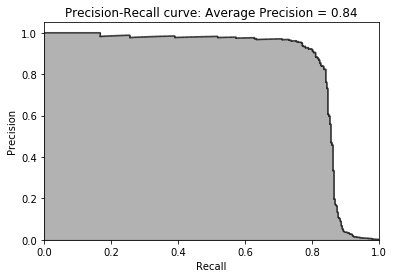

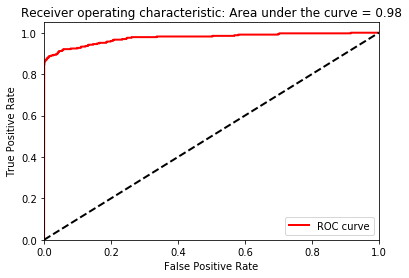

In [112]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [113]:
# Test Set Evaluation

In [114]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [115]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [116]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [117]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [118]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.11506635634096109
Log Loss of Random Forests on Test Set:  0.011419070688504264
Log Loss of XGBoost Gradient Boosting on Test Set:  0.002587003179484571
Log Loss of LightGBM Gradient Boosting on Test Set:  0.0024541905894112323


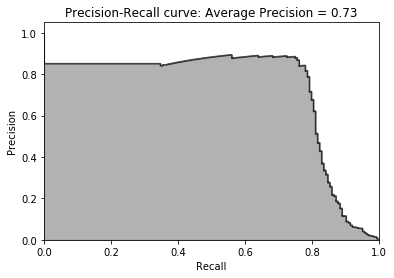

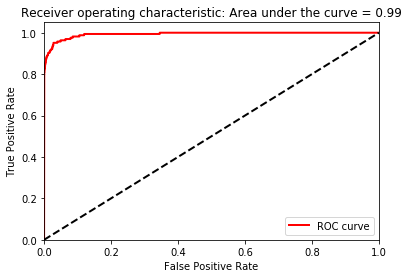

In [119]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

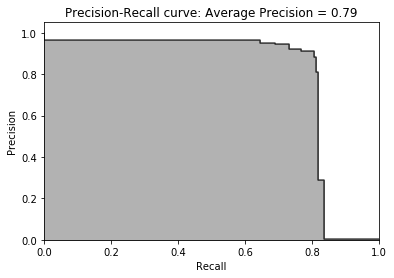

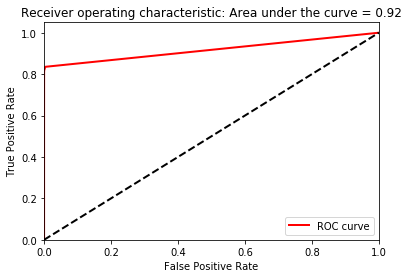

In [120]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

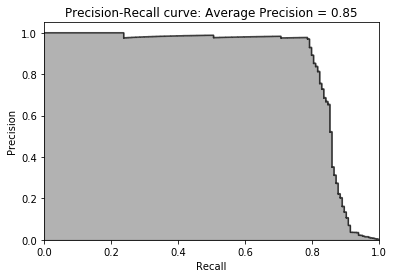

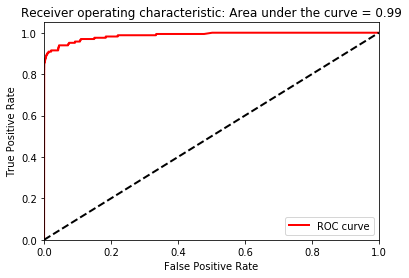

In [121]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

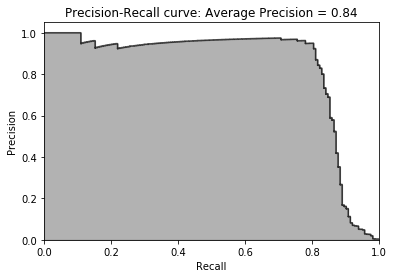

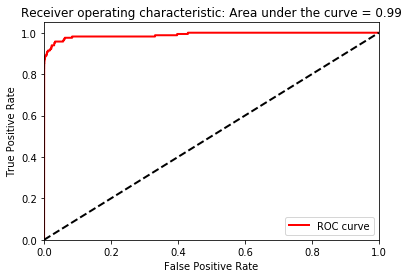

In [122]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [123]:
# Ensemble

In [124]:
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="3").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsXGB','predsLightGBM']

In [125]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

In [126]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [127]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00624045
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00619071
[3]	valid_0's binary_logloss: 0.00614411
[4]	valid_0's binary_logloss: 0.0061077
[5]	valid_0's binary_logloss: 0.00606762
[6]	valid_0's binary_logloss: 0.00602388
[7]	valid_0's binary_logloss: 0.00598766
[8]	valid_0's binary_logloss: 0.00594578
[9]	valid_0's binary_logloss: 0.00590861
[10]	valid_0's binary_logloss: 0.00586879
[11]	valid_0's binary_logloss: 0.00583253
[12]	valid_0's binary_logloss: 0.00579693
[13]	valid_0's binary_logloss: 0.00575698
[14]	valid_0's binary_logloss: 0.00572354
[15]	valid_0's binary_logloss: 0.00569094
[16]	valid_0's binary_logloss: 0.00565881
[17]	valid_0's binary_logloss: 0.00562666
[18]	valid_0's binary_logloss: 0.00558779
[19]	valid_0's binary_logloss: 0.00555133
[20]	valid_0's binary_logloss: 0.00551657
[21]	valid_0's binary_logloss: 0.00548842
[22]	valid_0's binary_logloss: 0.00545795
[23]	valid_0's binary_lo

[199]	valid_0's binary_logloss: 0.00379785
[200]	valid_0's binary_logloss: 0.00379563
[201]	valid_0's binary_logloss: 0.00379313
[202]	valid_0's binary_logloss: 0.00379237
[203]	valid_0's binary_logloss: 0.00379025
[204]	valid_0's binary_logloss: 0.00378856
[205]	valid_0's binary_logloss: 0.00378672
[206]	valid_0's binary_logloss: 0.00378536
[207]	valid_0's binary_logloss: 0.00378376
[208]	valid_0's binary_logloss: 0.0037818
[209]	valid_0's binary_logloss: 0.00378012
[210]	valid_0's binary_logloss: 0.00377862
[211]	valid_0's binary_logloss: 0.00377732
[212]	valid_0's binary_logloss: 0.00377565
[213]	valid_0's binary_logloss: 0.00377379
[214]	valid_0's binary_logloss: 0.00377178
[215]	valid_0's binary_logloss: 0.0037707
[216]	valid_0's binary_logloss: 0.00376912
[217]	valid_0's binary_logloss: 0.00376831
[218]	valid_0's binary_logloss: 0.00376713
[219]	valid_0's binary_logloss: 0.00376619
[220]	valid_0's binary_logloss: 0.00376573
[221]	valid_0's binary_logloss: 0.00376487
[222]	valid_0

[391]	valid_0's binary_logloss: 0.00370349
[392]	valid_0's binary_logloss: 0.0037031
[393]	valid_0's binary_logloss: 0.00370338
[394]	valid_0's binary_logloss: 0.00370279
[395]	valid_0's binary_logloss: 0.00370329
[396]	valid_0's binary_logloss: 0.00370208
[397]	valid_0's binary_logloss: 0.00370191
[398]	valid_0's binary_logloss: 0.00370069
[399]	valid_0's binary_logloss: 0.00370047
[400]	valid_0's binary_logloss: 0.00370082
[401]	valid_0's binary_logloss: 0.00370045
[402]	valid_0's binary_logloss: 0.0037002
[403]	valid_0's binary_logloss: 0.00369907
[404]	valid_0's binary_logloss: 0.00369912
[405]	valid_0's binary_logloss: 0.00369864
[406]	valid_0's binary_logloss: 0.0036988
[407]	valid_0's binary_logloss: 0.00369768
[408]	valid_0's binary_logloss: 0.00369667
[409]	valid_0's binary_logloss: 0.00369636
[410]	valid_0's binary_logloss: 0.0036969
[411]	valid_0's binary_logloss: 0.00369585
[412]	valid_0's binary_logloss: 0.00369536
[413]	valid_0's binary_logloss: 0.00369588
[414]	valid_0's

[584]	valid_0's binary_logloss: 0.00372083
[585]	valid_0's binary_logloss: 0.0037205
[586]	valid_0's binary_logloss: 0.00372117
[587]	valid_0's binary_logloss: 0.00372245
[588]	valid_0's binary_logloss: 0.00372212
[589]	valid_0's binary_logloss: 0.00372209
[590]	valid_0's binary_logloss: 0.00372336
[591]	valid_0's binary_logloss: 0.00372544
[592]	valid_0's binary_logloss: 0.00372513
[593]	valid_0's binary_logloss: 0.00372516
[594]	valid_0's binary_logloss: 0.00372532
[595]	valid_0's binary_logloss: 0.00372703
[596]	valid_0's binary_logloss: 0.00372672
[597]	valid_0's binary_logloss: 0.00372656
[598]	valid_0's binary_logloss: 0.00372785
[599]	valid_0's binary_logloss: 0.00372876
[600]	valid_0's binary_logloss: 0.00372846
[601]	valid_0's binary_logloss: 0.00372865
[602]	valid_0's binary_logloss: 0.00372788
[603]	valid_0's binary_logloss: 0.00372809
[604]	valid_0's binary_logloss: 0.00372779
[605]	valid_0's binary_logloss: 0.00372885
[606]	valid_0's binary_logloss: 0.00372907
[607]	valid_

[145]	valid_0's binary_logloss: 0.00345217
[146]	valid_0's binary_logloss: 0.00344908
[147]	valid_0's binary_logloss: 0.00344578
[148]	valid_0's binary_logloss: 0.00344282
[149]	valid_0's binary_logloss: 0.0034396
[150]	valid_0's binary_logloss: 0.0034371
[151]	valid_0's binary_logloss: 0.00343464
[152]	valid_0's binary_logloss: 0.00343201
[153]	valid_0's binary_logloss: 0.00342856
[154]	valid_0's binary_logloss: 0.00342609
[155]	valid_0's binary_logloss: 0.00342386
[156]	valid_0's binary_logloss: 0.00342079
[157]	valid_0's binary_logloss: 0.00341844
[158]	valid_0's binary_logloss: 0.00341515
[159]	valid_0's binary_logloss: 0.00341279
[160]	valid_0's binary_logloss: 0.00340931
[161]	valid_0's binary_logloss: 0.00340595
[162]	valid_0's binary_logloss: 0.00340267
[163]	valid_0's binary_logloss: 0.00339954
[164]	valid_0's binary_logloss: 0.00339604
[165]	valid_0's binary_logloss: 0.00339279
[166]	valid_0's binary_logloss: 0.0033881
[167]	valid_0's binary_logloss: 0.00338681
[168]	valid_0'

[337]	valid_0's binary_logloss: 0.00325953
[338]	valid_0's binary_logloss: 0.00325924
[339]	valid_0's binary_logloss: 0.00325916
[340]	valid_0's binary_logloss: 0.00325888
[341]	valid_0's binary_logloss: 0.00325971
[342]	valid_0's binary_logloss: 0.00325946
[343]	valid_0's binary_logloss: 0.00325939
[344]	valid_0's binary_logloss: 0.00325914
[345]	valid_0's binary_logloss: 0.00325936
[346]	valid_0's binary_logloss: 0.00325914
[347]	valid_0's binary_logloss: 0.00325938
[348]	valid_0's binary_logloss: 0.0032593
[349]	valid_0's binary_logloss: 0.00325909
[350]	valid_0's binary_logloss: 0.00325889
[351]	valid_0's binary_logloss: 0.00325831
[352]	valid_0's binary_logloss: 0.00325839
[353]	valid_0's binary_logloss: 0.00325834
[354]	valid_0's binary_logloss: 0.00325849
[355]	valid_0's binary_logloss: 0.00325794
[356]	valid_0's binary_logloss: 0.00325803
[357]	valid_0's binary_logloss: 0.00325818
[358]	valid_0's binary_logloss: 0.00325751
[359]	valid_0's binary_logloss: 0.00325767
[360]	valid_

[42]	valid_0's binary_logloss: 0.00333302
[43]	valid_0's binary_logloss: 0.00330923
[44]	valid_0's binary_logloss: 0.00328708
[45]	valid_0's binary_logloss: 0.00326409
[46]	valid_0's binary_logloss: 0.00324282
[47]	valid_0's binary_logloss: 0.00322094
[48]	valid_0's binary_logloss: 0.00320022
[49]	valid_0's binary_logloss: 0.00317973
[50]	valid_0's binary_logloss: 0.00315749
[51]	valid_0's binary_logloss: 0.00313653
[52]	valid_0's binary_logloss: 0.00311677
[53]	valid_0's binary_logloss: 0.0030971
[54]	valid_0's binary_logloss: 0.00307765
[55]	valid_0's binary_logloss: 0.00305823
[56]	valid_0's binary_logloss: 0.00303956
[57]	valid_0's binary_logloss: 0.00302083
[58]	valid_0's binary_logloss: 0.00300224
[59]	valid_0's binary_logloss: 0.00298463
[60]	valid_0's binary_logloss: 0.00296738
[61]	valid_0's binary_logloss: 0.00295043
[62]	valid_0's binary_logloss: 0.00293342
[63]	valid_0's binary_logloss: 0.00291663
[64]	valid_0's binary_logloss: 0.00290058
[65]	valid_0's binary_logloss: 0.00

[237]	valid_0's binary_logloss: 0.00177105
[238]	valid_0's binary_logloss: 0.0017693
[239]	valid_0's binary_logloss: 0.00176677
[240]	valid_0's binary_logloss: 0.00176416
[241]	valid_0's binary_logloss: 0.00176267
[242]	valid_0's binary_logloss: 0.00176019
[243]	valid_0's binary_logloss: 0.00175874
[244]	valid_0's binary_logloss: 0.00175769
[245]	valid_0's binary_logloss: 0.001756
[246]	valid_0's binary_logloss: 0.00175361
[247]	valid_0's binary_logloss: 0.00175178
[248]	valid_0's binary_logloss: 0.00174983
[249]	valid_0's binary_logloss: 0.00174753
[250]	valid_0's binary_logloss: 0.00174653
[251]	valid_0's binary_logloss: 0.0017448
[252]	valid_0's binary_logloss: 0.00174367
[253]	valid_0's binary_logloss: 0.00174244
[254]	valid_0's binary_logloss: 0.00174122
[255]	valid_0's binary_logloss: 0.00173917
[256]	valid_0's binary_logloss: 0.00173832
[257]	valid_0's binary_logloss: 0.0017372
[258]	valid_0's binary_logloss: 0.00173579
[259]	valid_0's binary_logloss: 0.00173438
[260]	valid_0's 

[429]	valid_0's binary_logloss: 0.00159561
[430]	valid_0's binary_logloss: 0.00159554
[431]	valid_0's binary_logloss: 0.00159496
[432]	valid_0's binary_logloss: 0.0015946
[433]	valid_0's binary_logloss: 0.00159507
[434]	valid_0's binary_logloss: 0.00159423
[435]	valid_0's binary_logloss: 0.00159446
[436]	valid_0's binary_logloss: 0.00159404
[437]	valid_0's binary_logloss: 0.00159382
[438]	valid_0's binary_logloss: 0.00159309
[439]	valid_0's binary_logloss: 0.00159302
[440]	valid_0's binary_logloss: 0.00159355
[441]	valid_0's binary_logloss: 0.00159356
[442]	valid_0's binary_logloss: 0.00159274
[443]	valid_0's binary_logloss: 0.00159216
[444]	valid_0's binary_logloss: 0.00159237
[445]	valid_0's binary_logloss: 0.00159166
[446]	valid_0's binary_logloss: 0.00159106
[447]	valid_0's binary_logloss: 0.00159043
[448]	valid_0's binary_logloss: 0.00158967
[449]	valid_0's binary_logloss: 0.00158968
[450]	valid_0's binary_logloss: 0.00158914
[451]	valid_0's binary_logloss: 0.00158922
[452]	valid_

[622]	valid_0's binary_logloss: 0.00155674
[623]	valid_0's binary_logloss: 0.00155687
[624]	valid_0's binary_logloss: 0.00155706
[625]	valid_0's binary_logloss: 0.00155679
[626]	valid_0's binary_logloss: 0.00155695
[627]	valid_0's binary_logloss: 0.00155715
[628]	valid_0's binary_logloss: 0.00155621
[629]	valid_0's binary_logloss: 0.00155591
[630]	valid_0's binary_logloss: 0.00155611
[631]	valid_0's binary_logloss: 0.00155583
[632]	valid_0's binary_logloss: 0.00155602
[633]	valid_0's binary_logloss: 0.00155537
[634]	valid_0's binary_logloss: 0.00155553
[635]	valid_0's binary_logloss: 0.00155588
[636]	valid_0's binary_logloss: 0.0015556
[637]	valid_0's binary_logloss: 0.00155581
[638]	valid_0's binary_logloss: 0.00155537
[639]	valid_0's binary_logloss: 0.00155475
[640]	valid_0's binary_logloss: 0.00155458
[641]	valid_0's binary_logloss: 0.00155429
[642]	valid_0's binary_logloss: 0.00155447
[643]	valid_0's binary_logloss: 0.00155473
[644]	valid_0's binary_logloss: 0.00155504
[645]	valid_

[814]	valid_0's binary_logloss: 0.00154598
[815]	valid_0's binary_logloss: 0.00154549
[816]	valid_0's binary_logloss: 0.00154501
[817]	valid_0's binary_logloss: 0.00154478
[818]	valid_0's binary_logloss: 0.00154435
[819]	valid_0's binary_logloss: 0.00154356
[820]	valid_0's binary_logloss: 0.00154333
[821]	valid_0's binary_logloss: 0.00154256
[822]	valid_0's binary_logloss: 0.00154215
[823]	valid_0's binary_logloss: 0.00154173
[824]	valid_0's binary_logloss: 0.00154152
[825]	valid_0's binary_logloss: 0.00154102
[826]	valid_0's binary_logloss: 0.00154147
[827]	valid_0's binary_logloss: 0.00154149
[828]	valid_0's binary_logloss: 0.0015415
[829]	valid_0's binary_logloss: 0.00154129
[830]	valid_0's binary_logloss: 0.00154108
[831]	valid_0's binary_logloss: 0.00154115
[832]	valid_0's binary_logloss: 0.00154125
[833]	valid_0's binary_logloss: 0.00154128
[834]	valid_0's binary_logloss: 0.0015413
[835]	valid_0's binary_logloss: 0.00154082
[836]	valid_0's binary_logloss: 0.00154027
[837]	valid_0

[1006]	valid_0's binary_logloss: 0.00151952
[1007]	valid_0's binary_logloss: 0.00151914
[1008]	valid_0's binary_logloss: 0.00151992
[1009]	valid_0's binary_logloss: 0.00151922
[1010]	valid_0's binary_logloss: 0.00151936
[1011]	valid_0's binary_logloss: 0.00151886
[1012]	valid_0's binary_logloss: 0.001519
[1013]	valid_0's binary_logloss: 0.00151893
[1014]	valid_0's binary_logloss: 0.00151912
[1015]	valid_0's binary_logloss: 0.00151865
[1016]	valid_0's binary_logloss: 0.00151848
[1017]	valid_0's binary_logloss: 0.00151927
[1018]	valid_0's binary_logloss: 0.00151921
[1019]	valid_0's binary_logloss: 0.00151939
[1020]	valid_0's binary_logloss: 0.00151988
[1021]	valid_0's binary_logloss: 0.00151995
[1022]	valid_0's binary_logloss: 0.00151922
[1023]	valid_0's binary_logloss: 0.0015199
[1024]	valid_0's binary_logloss: 0.00151956
[1025]	valid_0's binary_logloss: 0.00151962
[1026]	valid_0's binary_logloss: 0.00151963
[1027]	valid_0's binary_logloss: 0.00151981
[1028]	valid_0's binary_logloss: 0.

[1195]	valid_0's binary_logloss: 0.00153187
[1196]	valid_0's binary_logloss: 0.0015321
[1197]	valid_0's binary_logloss: 0.00153165
[1198]	valid_0's binary_logloss: 0.00153106
[1199]	valid_0's binary_logloss: 0.00153114
[1200]	valid_0's binary_logloss: 0.00153136
[1201]	valid_0's binary_logloss: 0.00153157
[1202]	valid_0's binary_logloss: 0.00153232
[1203]	valid_0's binary_logloss: 0.0015317
[1204]	valid_0's binary_logloss: 0.00153183
[1205]	valid_0's binary_logloss: 0.00153206
[1206]	valid_0's binary_logloss: 0.00153192
[1207]	valid_0's binary_logloss: 0.00153208
[1208]	valid_0's binary_logloss: 0.0015319
[1209]	valid_0's binary_logloss: 0.00153213
[1210]	valid_0's binary_logloss: 0.00153298
[1211]	valid_0's binary_logloss: 0.00153323
[1212]	valid_0's binary_logloss: 0.00153348
[1213]	valid_0's binary_logloss: 0.00153405
[1214]	valid_0's binary_logloss: 0.00153483
[1215]	valid_0's binary_logloss: 0.00153512
[1216]	valid_0's binary_logloss: 0.00153495
[1217]	valid_0's binary_logloss: 0.

[147]	valid_0's binary_logloss: 0.0030069
[148]	valid_0's binary_logloss: 0.00300193
[149]	valid_0's binary_logloss: 0.00299717
[150]	valid_0's binary_logloss: 0.00299201
[151]	valid_0's binary_logloss: 0.00298738
[152]	valid_0's binary_logloss: 0.00298297
[153]	valid_0's binary_logloss: 0.00297819
[154]	valid_0's binary_logloss: 0.00297411
[155]	valid_0's binary_logloss: 0.00296911
[156]	valid_0's binary_logloss: 0.00296471
[157]	valid_0's binary_logloss: 0.00296044
[158]	valid_0's binary_logloss: 0.00295586
[159]	valid_0's binary_logloss: 0.0029516
[160]	valid_0's binary_logloss: 0.0029467
[161]	valid_0's binary_logloss: 0.00294337
[162]	valid_0's binary_logloss: 0.00293933
[163]	valid_0's binary_logloss: 0.00293506
[164]	valid_0's binary_logloss: 0.00292982
[165]	valid_0's binary_logloss: 0.00292538
[166]	valid_0's binary_logloss: 0.0029216
[167]	valid_0's binary_logloss: 0.00291842
[168]	valid_0's binary_logloss: 0.00291535
[169]	valid_0's binary_logloss: 0.00291113
[170]	valid_0's

[339]	valid_0's binary_logloss: 0.00263594
[340]	valid_0's binary_logloss: 0.00263515
[341]	valid_0's binary_logloss: 0.00263566
[342]	valid_0's binary_logloss: 0.00263481
[343]	valid_0's binary_logloss: 0.00263471
[344]	valid_0's binary_logloss: 0.00263418
[345]	valid_0's binary_logloss: 0.00263341
[346]	valid_0's binary_logloss: 0.00263264
[347]	valid_0's binary_logloss: 0.00263096
[348]	valid_0's binary_logloss: 0.00263019
[349]	valid_0's binary_logloss: 0.00262836
[350]	valid_0's binary_logloss: 0.00262753
[351]	valid_0's binary_logloss: 0.0026275
[352]	valid_0's binary_logloss: 0.00262572
[353]	valid_0's binary_logloss: 0.00262597
[354]	valid_0's binary_logloss: 0.00262527
[355]	valid_0's binary_logloss: 0.00262482
[356]	valid_0's binary_logloss: 0.00262309
[357]	valid_0's binary_logloss: 0.00262338
[358]	valid_0's binary_logloss: 0.00262275
[359]	valid_0's binary_logloss: 0.00262251
[360]	valid_0's binary_logloss: 0.00262095
[361]	valid_0's binary_logloss: 0.00262032
[362]	valid_

[532]	valid_0's binary_logloss: 0.00260385
[533]	valid_0's binary_logloss: 0.00260389
[534]	valid_0's binary_logloss: 0.00260307
[535]	valid_0's binary_logloss: 0.00260356
[536]	valid_0's binary_logloss: 0.00260425
[537]	valid_0's binary_logloss: 0.00260383
[538]	valid_0's binary_logloss: 0.00260417
[539]	valid_0's binary_logloss: 0.00260312
[540]	valid_0's binary_logloss: 0.00260322
[541]	valid_0's binary_logloss: 0.00260244
[542]	valid_0's binary_logloss: 0.00260267
[543]	valid_0's binary_logloss: 0.00260298
[544]	valid_0's binary_logloss: 0.00260344
[545]	valid_0's binary_logloss: 0.00260389
[546]	valid_0's binary_logloss: 0.00260453
[547]	valid_0's binary_logloss: 0.00260501
[548]	valid_0's binary_logloss: 0.00260457
[549]	valid_0's binary_logloss: 0.00260497
[550]	valid_0's binary_logloss: 0.00260523
[551]	valid_0's binary_logloss: 0.00260637
[552]	valid_0's binary_logloss: 0.00260649
[553]	valid_0's binary_logloss: 0.00260695
[554]	valid_0's binary_logloss: 0.00260734
[555]	valid

[14]	valid_0's binary_logloss: 0.00492888
[15]	valid_0's binary_logloss: 0.00489027
[16]	valid_0's binary_logloss: 0.00485154
[17]	valid_0's binary_logloss: 0.00481431
[18]	valid_0's binary_logloss: 0.00477926
[19]	valid_0's binary_logloss: 0.00474486
[20]	valid_0's binary_logloss: 0.00470791
[21]	valid_0's binary_logloss: 0.00467446
[22]	valid_0's binary_logloss: 0.00464088
[23]	valid_0's binary_logloss: 0.00460641
[24]	valid_0's binary_logloss: 0.00457464
[25]	valid_0's binary_logloss: 0.0045437
[26]	valid_0's binary_logloss: 0.00451147
[27]	valid_0's binary_logloss: 0.00448183
[28]	valid_0's binary_logloss: 0.00445502
[29]	valid_0's binary_logloss: 0.00442743
[30]	valid_0's binary_logloss: 0.0043994
[31]	valid_0's binary_logloss: 0.00437128
[32]	valid_0's binary_logloss: 0.00434272
[33]	valid_0's binary_logloss: 0.0043165
[34]	valid_0's binary_logloss: 0.00429284
[35]	valid_0's binary_logloss: 0.0042663
[36]	valid_0's binary_logloss: 0.00424222
[37]	valid_0's binary_logloss: 0.00421

[212]	valid_0's binary_logloss: 0.00274918
[213]	valid_0's binary_logloss: 0.00274724
[214]	valid_0's binary_logloss: 0.00274542
[215]	valid_0's binary_logloss: 0.00274379
[216]	valid_0's binary_logloss: 0.00274197
[217]	valid_0's binary_logloss: 0.00274059
[218]	valid_0's binary_logloss: 0.00273859
[219]	valid_0's binary_logloss: 0.00273709
[220]	valid_0's binary_logloss: 0.0027352
[221]	valid_0's binary_logloss: 0.0027341
[222]	valid_0's binary_logloss: 0.0027328
[223]	valid_0's binary_logloss: 0.00273209
[224]	valid_0's binary_logloss: 0.00273089
[225]	valid_0's binary_logloss: 0.00273013
[226]	valid_0's binary_logloss: 0.00272834
[227]	valid_0's binary_logloss: 0.00272721
[228]	valid_0's binary_logloss: 0.00272573
[229]	valid_0's binary_logloss: 0.00272485
[230]	valid_0's binary_logloss: 0.00272416
[231]	valid_0's binary_logloss: 0.00272305
[232]	valid_0's binary_logloss: 0.00272259
[233]	valid_0's binary_logloss: 0.00272133
[234]	valid_0's binary_logloss: 0.00272008
[235]	valid_0'

[406]	valid_0's binary_logloss: 0.0026834
[407]	valid_0's binary_logloss: 0.00268369
[408]	valid_0's binary_logloss: 0.0026836
[409]	valid_0's binary_logloss: 0.00268365
[410]	valid_0's binary_logloss: 0.00268384
[411]	valid_0's binary_logloss: 0.00268368
[412]	valid_0's binary_logloss: 0.00268381
[413]	valid_0's binary_logloss: 0.00268392
[414]	valid_0's binary_logloss: 0.00268319
[415]	valid_0's binary_logloss: 0.00268359
[416]	valid_0's binary_logloss: 0.00268369
[417]	valid_0's binary_logloss: 0.00268409
[418]	valid_0's binary_logloss: 0.0026843
[419]	valid_0's binary_logloss: 0.0026836
[420]	valid_0's binary_logloss: 0.00268349
[421]	valid_0's binary_logloss: 0.00268363
[422]	valid_0's binary_logloss: 0.00268381
[423]	valid_0's binary_logloss: 0.00268366
[424]	valid_0's binary_logloss: 0.00268392
[425]	valid_0's binary_logloss: 0.00268427
[426]	valid_0's binary_logloss: 0.00268435
[427]	valid_0's binary_logloss: 0.0026846
[428]	valid_0's binary_logloss: 0.00268485
[429]	valid_0's 

In [128]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [161, 74, 34, 63, 289, 58, 23, 258, 204, 134, 196, 165, 202, 186, 250, 265, 62, 40, 30, 218, 260, 99, 112, 98, 118, 47, 186, 125, 107, 215, 347, 248, 166, 414]


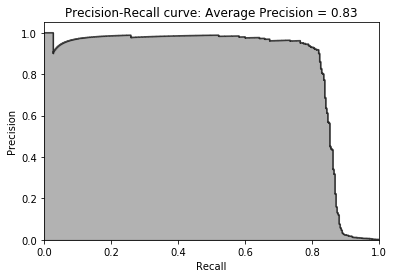

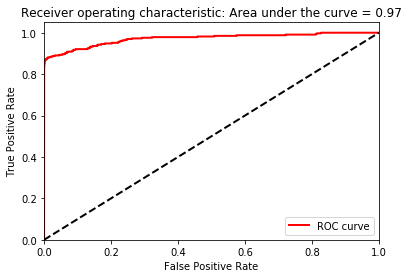

In [129]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

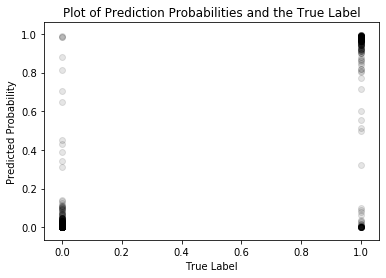

In [130]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

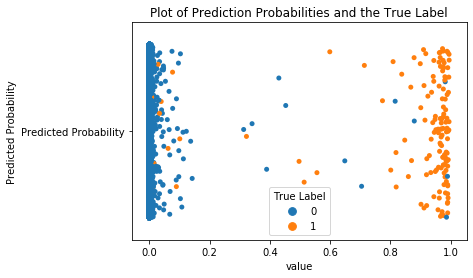

In [131]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [132]:
'''Pipeline for New Data'''
# first, import new data into a dataframe called 'newData'
# second, scale data
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# third, predict using LightGBM
# gbm.predict(newData, num_iteration=gbm.best_iteration)

'Pipeline for New Data'